In [33]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import env

from sklearn.model_selection import train_test_split

# 1. Acquire customer_id, monthly_charges, tenure, and total_charges from telco_churn database for all customers with a 2 year contract.

In [2]:
def get_connection(db, user=env.user, host=env.host, password=env.password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

In [3]:
## contract type 3 == two year contract

sql = '''
select customer_id, monthly_charges, tenure, total_charges
from customers
where contract_type_id = 3;
'''

In [4]:
df = pd.read_sql(sql, get_connection('telco_churn'))

In [5]:
df.head()

,customer_id,monthly_charges,tenure,total_charges
0,0013-SMEOE,109.70,71,7904.25
1,0014-BMAQU,84.65,63,5377.8
2,0016-QLJIS,90.45,65,5957.9
3,0017-DINOC,45.20,54,2460.55
4,0017-IUDMW,116.80,72,8456.75


In [6]:
df.to_csv('wrangle_telco.csv')

# 2. Walk through the steps above using your new dataframe. You may handle the missing values however you feel is appropriate.

In [7]:
df.shape

(1695, 4)

In [8]:
df.describe()

,monthly_charges,tenure
count,1695.000000,1695.000000
mean,60.770413,56.735103
std,34.678865,18.209363
min,18.400000,0.000000
25%,24.025000,48.000000
50%,64.350000,64.000000
75%,90.450000,71.000000
max,118.750000,72.000000


In [9]:
## total_charges is missing

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1695 entries, 0 to 1694
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      1695 non-null   object 
 1   monthly_charges  1695 non-null   float64
 2   tenure           1695 non-null   int64  
 3   total_charges    1695 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 53.1+ KB


In [11]:
## total_charges is an object

In [12]:
print(df.isnull().sum())

customer_id        0
monthly_charges    0
tenure             0
total_charges      0
dtype: int64


In [13]:
print(df.columns[df.isnull().any()])

Index([], dtype='object')


In [14]:
df.total_charges.value_counts(sort=True, ascending=True)

6841.3      1
1679.25     1
6997.3      1
454.65      1
5737.6      1
           ..
7334.05     2
844.45      2
5682.25     2
5714.2      2
           10
Name: total_charges, Length: 1678, dtype: int64

In [15]:
## 10 values with blank space

In [16]:
df.replace(r'^\s*$', np.nan, regex=True, inplace=True)

# replace white space objects with NaN

In [17]:
df = df.dropna()

# remove all NaN values

In [18]:
df.total_charges = df.total_charges.astype('float')

In [19]:
df.describe()

,monthly_charges,tenure,total_charges
count,1685.000000,1685.00000,1685.000000
mean,60.872374,57.07181,3728.933947
std,34.712210,17.72913,2571.252806
min,18.400000,1.00000,20.350000
25%,24.050000,48.00000,1278.800000
50%,64.450000,64.00000,3623.950000
75%,90.550000,71.00000,5999.850000
max,118.750000,72.00000,8672.450000


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1685 entries, 0 to 1694
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      1685 non-null   object 
 1   monthly_charges  1685 non-null   float64
 2   tenure           1685 non-null   int64  
 3   total_charges    1685 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 65.8+ KB


In [21]:
## total_charges is now a float, null values have been removed 

### Visualize Distribution

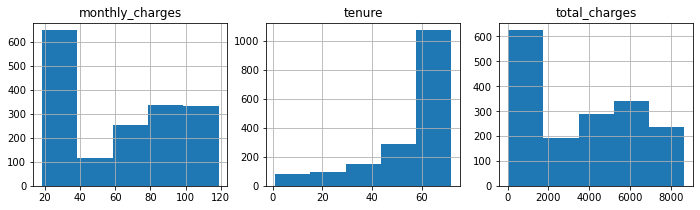

In [22]:
plt.figure(figsize=(16, 3))

for i, col in enumerate(['monthly_charges', 'tenure', 'total_charges']):  
    plot_number = i + 1 # i starts at 0, but plot nos should start at 1
    series = df[col]  
    plt.subplot(1,4, plot_number)
    plt.title(col)
    series.hist(bins=5)

In [23]:
## largest bin has lowest monthly and total charges but highest tenure

<AxesSubplot:>

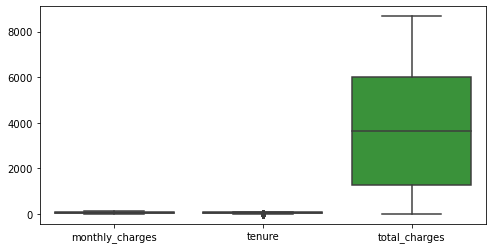

In [24]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df.drop(columns=['customer_id']))

# 3. End with a python file wrangle.py that contains the function, wrangle_telco(), that will acquire the data and return a dataframe cleaned with no missing values.

In [41]:
def split(df, stratify_by=None):
    """
    Crude train, validate, test split
    To stratify, send in a column name
    """
    
    if stratify_by == None:
        train, test = train_test_split(df, test_size=.2, random_state=319)
        train, validate = train_test_split(train, test_size=.3, random_state=319)
    else:
        train, test = train_test_split(df, test_size=.2, random_state=319, stratify=df[stratify_by])
        train, validate = train_test_split(train, test_size=.3, random_state=319, stratify=train[stratify_by])
    
    return train, validate, test

In [36]:
def wrangle_telco():
    data = pd.read_csv("wrangle_telco.csv")
    
    data['total_charges'].replace(r'^\s*$', np.nan, regex=True, inplace=True)
    # replace white space objects with NaN
    
    data = data.dropna()
    # remove all NaN values
    
    data.total_charges = data.total_charges.astype('float')
    # converts total_charges from object to float
    
    df = data.drop(columns='Unnamed: 0', inplace=True)    
    
    return data



In [38]:
df2 = wrangle_telco()

In [39]:
df2

,customer_id,monthly_charges,tenure,total_charges
0,0013-SMEOE,109.70,71,7904.25
1,0014-BMAQU,84.65,63,5377.80
2,0016-QLJIS,90.45,65,5957.90
3,0017-DINOC,45.20,54,2460.55
4,0017-IUDMW,116.80,72,8456.75
...,...,...,...,...
1690,9964-WBQDJ,24.40,71,1725.40
1691,9972-EWRJS,19.25,67,1372.90
1692,9975-GPKZU,19.75,46,856.50
1693,9993-LHIEB,67.85,67,4627.65


In [28]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1685 entries, 0 to 1694
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      1685 non-null   object 
 1   monthly_charges  1685 non-null   float64
 2   tenure           1685 non-null   int64  
 3   total_charges    1685 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 65.8+ KB


In [42]:
train, validate, test = split(df2)

In [43]:
train.head()

,customer_id,monthly_charges,tenure,total_charges
1096,6586-MYGKD,76.95,70,5289.80
218,1270-XKUCC,19.70,30,599.25
1067,6425-JWTDV,19.25,48,855.10
1159,6916-HIJSE,84.85,65,5459.20
1384,8173-RXAYP,19.70,24,452.55


In [44]:
train.shape

(943, 4)

In [45]:
validate.head()

,customer_id,monthly_charges,tenure,total_charges
940,5707-ZMDJP,69.70,53,3729.60
783,4827-DPADN,83.30,72,6042.70
302,1897-OKVMW,90.60,64,5817.45
1523,8990-YOZLV,66.90,69,4577.90
562,3428-MMGUB,89.55,60,5231.20


In [46]:
validate.shape

(405, 4)

In [47]:
test.head()

,customer_id,monthly_charges,tenure,total_charges
303,1904-WAJAA,64.35,24,1558.65
785,4835-YSJMR,49.80,39,1971.15
1316,7771-CFQRQ,63.80,47,3007.25
939,5702-KVQRD,82.55,71,5832.65
633,3796-ENZGF,67.25,63,4234.15


In [48]:
test.shape

(337, 4)